In [1]:
import sympy as sym
x = sym.Symbol('x')
from sympy import tan, sin, cos

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

from scipy.optimize import minimize

from scipy import stats
import seaborn as sns

1(a):

In [2]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

user_x = [2, 4, 3, 5, 10, 6, 10, 7, 9, 5, 9, 1, 2, 6, 6]

In [3]:
near_res = []
for i in range(10):
    near_res.append(np.dot(user_x, raitings[i])/(np.linalg.norm(user_x)*np.linalg.norm(raitings[i])))

for i in range(10):
    print(user_x, ' * ', raitings[i], ' = ', near_res[i])
    
#Наилучшее совпадение:
index = np.argmax(near_res)
print('Наилучшее совпадение с пользователем: ', index)
print(user_x, ' * ', raitings[index], ' = ', near_res[index])

[2, 4, 3, 5, 10, 6, 10, 7, 9, 5, 9, 1, 2, 6, 6]  *  [ 4  4  9  4  1  6 10  7  9  6  9  2  8  6  6]  =  0.8733037233300475
[2, 4, 3, 5, 10, 6, 10, 7, 9, 5, 9, 1, 2, 6, 6]  *  [ 9  2  5 10  7  8 10  5  6  2  1  6  8  9  7]  =  0.812513678105866
[2, 4, 3, 5, 10, 6, 10, 7, 9, 5, 9, 1, 2, 6, 6]  *  [ 1  6  8  8  4  9  3  8 10  5  2  6  8  1  6]  =  0.7757485785878657
[2, 4, 3, 5, 10, 6, 10, 7, 9, 5, 9, 1, 2, 6, 6]  *  [6 1 9 7 7 9 2 3 5 1 6 6 3 2 7]  =  0.7757869443436181
[2, 4, 3, 5, 10, 6, 10, 7, 9, 5, 9, 1, 2, 6, 6]  *  [ 3  7  3  5  7  9  9  6  2  9  1  2  8 10  6]  =  0.8281065071915114
[2, 4, 3, 5, 10, 6, 10, 7, 9, 5, 9, 1, 2, 6, 6]  *  [ 8  3  7  3  8  6  1  8  8  6  1  9  4 10  1]  =  0.7345739745912411
[2, 4, 3, 5, 10, 6, 10, 7, 9, 5, 9, 1, 2, 6, 6]  *  [ 9  8  4  8  8 10  6  1  1  2  9  5  2  7  2]  =  0.7886605550383288
[2, 4, 3, 5, 10, 6, 10, 7, 9, 5, 9, 1, 2, 6, 6]  *  [ 4  1  6  4  3 10  4  4  2  8  7  9  3  8  3]  =  0.7542705662080117
[2, 4, 3, 5, 10, 6, 10, 7, 9, 5, 9, 1, 2

UPD: Да, конечно нужно брать макисмальное значение (cos(0) = 1)

В общем случае к заданному юзеру может быть несколько пар с одинаково максимальным значением

UPD2: Не совсем понял что значит вывести все пары, но кажется имелось в виду то что вроде того что выше:

можно вывести на экран, записать в отдельную переменную и вывести её на экран, кажется это вообще не принципиально)
        
или например просто user_x * пользователь из базы = результат, как выше

1(b):

Интуиция подсказывает что для уменьшения размерности можно использовать PCA анализ, который сохранит максимальную дисперсию в итоговых 5 столбцах. Cохраним как можно больше полезной информации о данных, оставив только 5 фильмов, для которых пользователи ставят наиболее разные оценки

2.

In [4]:
func = sym.tan((sin(x))+cos(2*x+3))**2
func

tan(sin(x) + cos(2*x + 3))**2

In [5]:
d_dx = sym.diff(func, x)
d_dx

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [6]:
d_dx.subs({x:1})

2*(1 + tan(cos(5) + sin(1))**2)*(cos(1) - 2*sin(5))*tan(cos(5) + sin(1))

Производная на бумаге: https://drive.google.com/file/d/1NQEvUAsa2hTqy3X2wiGEPw7yuj3rDVJh/view?usp=sharing 

3.

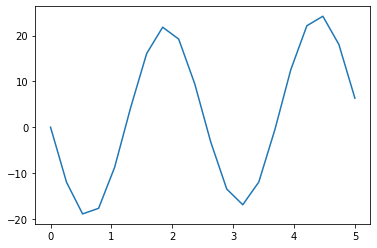

In [88]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

plt.plot(x, fx)
plt.show()

In [146]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [202]:
a0 = -50
b0 = -50

a = []
b = []
errors = []

for i in range(1000):
    a.append(a0)
    a0 += 0.1
    
    b.append(b0)
    b0 += 0.1
    
    x0 = [a[i], b[i]]
    res = minimize(error, x0, method='Nelder-Mead')
    
    if res.fun < 0.0001:
        print(res)

 final_simplex: (array([[  3.0000002 , -26.37610422],
       [  2.99999981, -26.37610422],
       [  3.00000016, -26.37610394]]), array([6.43982417e-05, 6.84070956e-05, 1.60352799e-04]))
           fun: 6.439824170278996e-05
       message: 'Optimization terminated successfully.'
          nfev: 234
           nit: 121
        status: 0
       success: True
             x: array([  3.0000002 , -26.37610422])
 final_simplex: (array([[  2.9999999 , -26.37610409],
       [  2.99999991, -26.37610433],
       [  3.00000038, -26.37610429]]), array([5.63898133e-05, 1.14283044e-04, 1.27132727e-04]))
           fun: 5.638981334676885e-05
       message: 'Optimization terminated successfully.'
          nfev: 133
           nit: 68
        status: 0
       success: True
             x: array([  2.9999999 , -26.37610409])
 final_simplex: (array([[  3.00000026, -26.3761041 ],
       [  3.00000009, -26.37610433],
       [  2.99999938, -26.37610405]]), array([8.33146723e-05, 1.13882530e-04, 1.719341

In [201]:
x3 = [2.99999984, -26.37610404]
res = minimize(error, x3, method='TNC')
res

     fun: 6.654315949727874e-05
     jac: array([-179.72938758, -466.54879288])
 message: 'Converged (|x_n-x_(n-1)| ~= 0)'
    nfev: 9
     nit: 1
  status: 2
 success: True
       x: array([  2.99999984, -26.37610423])

4.

<AxesSubplot:ylabel='Count'>

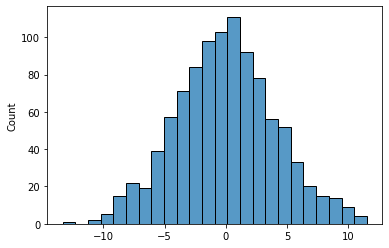

In [203]:
uniform_rv = stats.uniform(loc=-50, scale=100)

m_list = []

for i in range(1000):
    data = uniform_rv.rvs(size=50)
    m_list.append(data.mean())
    
sns.histplot(x=m_list)

5.

In [204]:
m = np.array([[1, 4],
              [1, 1]])
m

array([[1, 4],
       [1, 1]])

In [205]:
np.linalg.eig(m)

(array([ 3., -1.]),
 array([[ 0.89442719, -0.89442719],
        [ 0.4472136 ,  0.4472136 ]]))

Решение на бумаге: https://drive.google.com/file/d/1oA407JMNSa42NQUknJbnQx4hI7E5d8Y5/view?usp=sharing

.